<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
x = np.linspace(-10,10,200)
y = 1 / (1 + np.exp(-x))

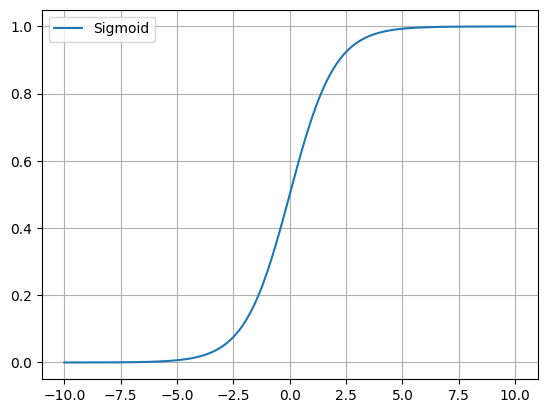

In [13]:
plt.plot(x,y)
plt.grid(True)
plt.legend(['Sigmoid'])
plt.show()

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [15]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [16]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5053326657968679

1. RMSE is 0.5 which is as good as a random clssifier
2. Note we are not using any activation function. MLPRegressor does not support activation functions

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [19]:
X_train, X_valid, X_test = X_train / 255 , X_valid / 255 , X_test / 255

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
X_train.shape

(55000, 28, 28)

In [45]:
tf.random.set_seed(42)
# Input shape (28, 28), training size = 55000
model = tf.keras.models.Sequential()
# Input shape does not include batch size, only shape of the instance.
# Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the 1st hidden layer
model.add(tf.keras.layers.Input(shape=(28,28)))

# Flatten layer converts input 2D image into 1D array. If it receives a batch of [32, 28, 28] it will reshape it to [32, 784]
# Why do we need flattening. Because Dense layer works with 1D data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
# output layer , problem type - multi-class classification. So the classes are mutually exclusive, i.e, an instance can belong to only one class. So we will use softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# we use sparse-cc because we have sparse labels, there is just a target class index
model.compile(loss="sparse_categorical_crossentropy" , optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6939 - loss: 0.9696 - val_accuracy: 0.8292 - val_loss: 0.5052
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8248 - loss: 0.5094 - val_accuracy: 0.8384 - val_loss: 0.4572
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8419 - loss: 0.4574 - val_accuracy: 0.8454 - val_loss: 0.4343
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8525 - loss: 0.4272 - val_accuracy: 0.8518 - val_loss: 0.4198
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8593 - loss: 0.4051 - val_accuracy: 0.8562 - val_loss: 0.4074
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8653 - loss: 0.3873 - val_accuracy: 0.8586 - val_loss: 0.3979
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8702 - loss: 0.3728 - val_accuracy: 0.8600 - val_loss: 0.3910
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.36

Target shape - shape of the labels in the dataset.
target.shape = (None,) - 1D-array containing integer class labels

Output shape - is shape defined in the output layer of model.
output shape = (None,10) means model's output layer produces a 2D array with 10 probabilities, representing the likelihood of belonging to each of the 10 classes.

**On using Adam Optimizer instead of sgd, we see the validation loss decreases in first 3 epochs and then it increases with epochs.**

In [43]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 799,832 (3.05 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,222 (2.03 MB)

1. Each dense layer manages its own weight matrix, containing all connection weights between the neurons and their inputs. It also manages a vector of bias terms.
2. When it recieves some input data it computes this eq

h(X) = activation(W * X + b)

1. High number of parameters gives model flexibility to fit the training data.
2. It may be the reason of overfitting when training data is small
3. The name of the layers is unique, so that the models can be merged.
4. All global names managed by keras is stored in keras session - tf.keras.backend.clear_session()

In [29]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [33]:
# how to get weights, biases of a hidden layer
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

<Flatten name=flatten_4, built=True>
<Dense name=dense_12, built=True>
<Dense name=dense_13, built=True>
<Dense name=dense_14, built=True>


**Why the weights of Dense layer is initialized randomly - To break the symmetry between the layers.**

**What will you do when some classes are overrepresented in the training data ?**
1. Give larger weight to underrepresented classes and a lower weight to overrepresnted classes. Use the class_weight argument
2. Assign per instance weight using sample_weight argument

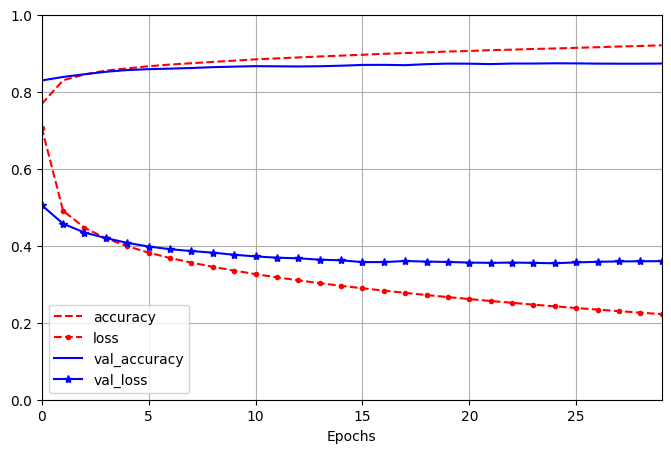

In [46]:
# Plotting the learning curves
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epochs", style=["r--","r--.","b-","b-*"])
plt.show()

If model performance is not satisfactory, - Hyperparameter Tuning
1. Hyperparameter tuning is done based on validation data, not on test data
- Learning Rate
- Use another optimizer -**Always retune the learning rate after changing any hyperparameter**
- Tune number of layers, no of nuerons per layer, types of activation function used in hidden layers
- Tune the batch size.

Only once you are satified with model accuracy on validation data, you should evaluate it on the test set

In [51]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.01, 0.  , 0.72],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
# y_proba is a 2D array. you can get the index of max value along each row, using axis=1
y_proba.argmax(axis=1)

array([0, 2, 1, 0, 1, 0, 0, 0, 0, 0])

In [55]:
np.array(class_names)[y_proba.argmax(axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

**Regression MLP** -
Problem statement/dataset - California Housing dataset
Difference from Classifier MLP -
1. Single output neuron - that predicted value of house
2. Loss Function - MSE (instead of sparse_categorical_crossentropy) and metric - RMSE
3. Optimizer - Adam (instead of SGD)
4. No activation function in the last output layer

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [58]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [68]:
X_train.round(2)


array([[   3.52,   15.  ,    3.05, ...,    1.61,   37.63, -122.43],
       [   5.33,    5.  ,    6.49, ...,    3.44,   33.69, -117.39],
       [   3.1 ,   29.  ,    7.54, ...,    2.25,   38.44, -122.98],
       ...,
       [   1.56,   35.  ,    4.14, ...,    3.28,   34.11, -117.29],
       [   2.11,   52.  ,    5.18, ...,    2.93,   36.76, -119.79],
       [   5.6 ,   31.  ,    6.22, ...,    2.54,   38.04, -122.2 ]])

In [70]:
norm_layer = tf.keras.layers.Normalization(input_shape=(X_train.shape[1:]))
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["RootMeanSquaredError"]
)
# The Normalization layer learns feature means and standard deviation when adapt() method is called.
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.2326 - loss: 1.6317 - val_RootMeanSquaredError: 0.8577 - val_loss: 0.7357
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6332 - loss: 0.4011 - val_RootMeanSquaredError: 0.7514 - val_loss: 0.5646
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6016 - loss: 0.3622 - val_RootMeanSquaredError: 0.7660 - val_loss: 0.5867
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5864 - loss: 0.3441 - val_RootMeanSquaredError: 1.0385 - val_loss: 1.0784
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5756 - loss: 0.3314 - val_RootMeanSquaredError: 1.2843 - val_loss: 1.6494
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5678 - loss: 0.3226 - val_RootMeanSquaredError: 1.2093 - val_loss: 1.4625
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5646 - loss: 0.3189 -

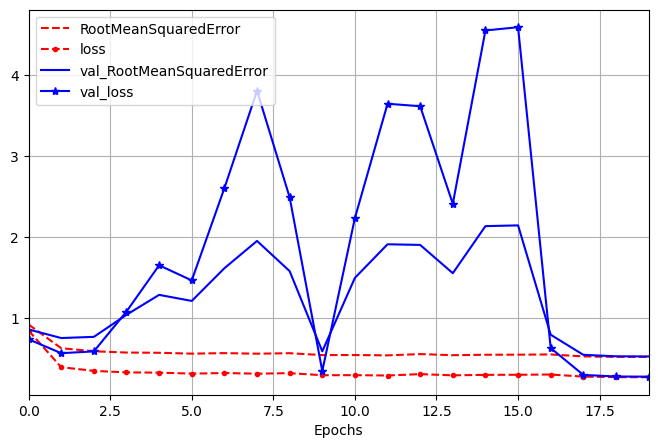

In [72]:
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,19], grid=True, xlabel="Epochs", style=["r--","r--.","b-","b-*"])
plt.show()

In [73]:
model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5330 - loss: 0.2842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.52716535],
       [1.1651695 ],
       [5.2014556 ]], dtype=float32)